<a href="https://colab.research.google.com/github/Kimjibeom/Python_Example/blob/main/KNeighborsClassifier_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%83%9D%EC%A1%B4%EC%9E%90_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 정의

*   KNeighborsClassifier 사용하여 타이타닉 생존자(1), 사망(0) 예측



기본 라이브러리 불러오기

In [35]:
import pandas as pd
import seaborn as sns

지도학습 알고리즘

In [71]:
pip install mglearn

     |████████████████████████████████| 542kB 2.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=51e78a06332cf4ac225a7628259ff9a97ffbcf0853d3482b9d261d09729176c3
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [73]:
import mglearn
import matplotlib.pyplot as plt
# 한글 폰트 설치
import matplotlib.font_manager as fm  # 폰트 관련 용도

# 나눔 고딕 인스톨
!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고
# fm._rebuild() 를 해줘야 system 에 추가 설치된 폰트를 matplotilb.font_manager 가 알아차리는 것으로 보인다.
fm._rebuild()

Selecting previously unselected package fonts-nanum-eco.
(Reading database ... 160790 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumMyeongjo


한글 깨짐 방지

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


[Step 1] 데이터 준비 - Seaborn에서 제공하는 titanic 데이터셋 가져오기

In [37]:
#load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

In [38]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


NaN값이 많은 deck(객실 데크 위치) 열을 삭제, embarked와 내용이 겹치는 embark_town(승선 도시) 열을 삭제


In [40]:
# NaN값이 많은 deck(객실 데크 위치) 열을 삭제, embarked와 내용이 겹치는 embark_town(승선 도시) 열을 삭제

rdf = df.drop(['deck', 'embark_town'], axis=1)
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.4+ KB


In [41]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 -> 177개 Nan 삭제
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    714 non-null    int64   
 1   pclass      714 non-null    int64   
 2   sex         714 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       714 non-null    int64   
 5   parch       714 non-null    int64   
 6   fare        714 non-null    float64 
 7   embarked    712 non-null    object  
 8   class       714 non-null    category
 9   who         714 non-null    object  
 10  adult_male  714 non-null    bool    
 11  alive       714 non-null    object  
 12  alone       714 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 63.6+ KB


In [42]:
# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값 확인 -> 탑승한 도시의 첫글자
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
most_freq

'S'

In [43]:
rdf.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
count,714.000000,714.000000,714,714.000000,714.000000,714.000000,714.000000,712,714,714,714,714,714
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,no,True
freq,NaN,NaN,453,NaN,NaN,NaN,NaN,554,355,413,413,424,404
mean,0.406162,2.236695,NaN,29.699118,0.512605,0.431373,34.694514,NaN,NaN,NaN,NaN,NaN,NaN
std,0.491460,0.838250,NaN,14.526497,0.929783,0.853289,52.918930,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,20.125000,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.741700,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.375000,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# embarked 열의 Nan값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
rdf['embarked'].fillna(most_freq, inplace=True)

In [45]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    714 non-null    int64   
 1   pclass      714 non-null    int64   
 2   sex         714 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       714 non-null    int64   
 5   parch       714 non-null    int64   
 6   fare        714 non-null    float64 
 7   embarked    714 non-null    object  
 8   class       714 non-null    category
 9   who         714 non-null    object  
 10  adult_male  714 non-null    bool    
 11  alive       714 non-null    object  
 12  alone       714 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 63.6+ KB


[Step 3] 분석에 사용할 속성을 선택

In [46]:
# 분석에 활용할 열(속성)을 선택 (생족 여부, 객실 등급, 성별, 나이, 타이타닉에 탑승한 형제 자매수,
# 타이타닉에 탑승한 부모/자녀 수, 탑승한 곳(항구) C = Cherbourg, Q = Queenstown, S =Southampton)
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [47]:
#원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변경
# male, female -> [1, 0], [0, 1]
# embarked C, Q, S -> [1, 0, 0] , [0, 1, 0], [0, 0, 1]

onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked,female,male
0,0,3,male,22.0,1,0,S,0,1
1,1,1,female,38.0,1,0,C,1,0
2,1,3,female,26.0,0,0,S,1,0
3,1,1,female,35.0,1,0,S,1,0
4,0,3,male,35.0,0,0,S,0,1


In [48]:
# embarked C, Q, S -> [1, 0, 0],[0, 1, 0],[0, 0, 1]

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked,female,male,town_C,town_Q,town_S
0,0,3,male,22.0,1,0,S,0,1,0,0,1
1,1,1,female,38.0,1,0,C,1,0,1,0,0
2,1,3,female,26.0,0,0,S,1,0,0,0,1
3,1,1,female,35.0,1,0,S,1,0,0,0,1
4,0,3,male,35.0,0,0,S,0,1,0,0,1


In [49]:
# 기존 컬럼 삭제
ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [56]:
# ndf -> X, y (문제집, 정답지)
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male','town_C','town_Q','town_S']] # 독립변수
y = ndf['survived']

y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

In [58]:
# train 데이터와 test 데이터로 구분 (7:3비율)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=7)

print(X_train.shape)
print(X_test.shape)

(499, 9)
(215, 9)


[Step 5] KNN 분류 모형 - sklearn 사용

In [60]:
# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

In [61]:
# train 데이터를 사용하여 모형 학습
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
# test 데이터를 가지고 y_hat을 예측 (분류)
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 1 0 1 1 0 0 0 0 0]
[0 1 0 1 0 0 1 0 0 0]


모델 성능 평가

In [63]:
from sklearn import metrics

# 모형 성능 평가- 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)
print("테스트 평가지표 n_neighbors=5")
print(knn_report)

테스트 평가지표 n_neighbors=5
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       126
           1       0.78      0.69      0.73        89

    accuracy                           0.79       215
   macro avg       0.79      0.78      0.78       215
weighted avg       0.79      0.79      0.79       215



In [64]:
# sklearn 을 이용하면 전부 계산해준다.
print('accuracy: ', metrics.accuracy_score(y_test,y_hat))
print('precision: ', metrics.precision_score(y_test,y_hat))
print('recall: ', metrics.recall_score(y_test,y_hat))
print('f1: ', metrics.f1_score(y_test,y_hat))

accuracy:  0.7906976744186046
precision:  0.782051282051282
recall:  0.6853932584269663
f1:  0.7305389221556887


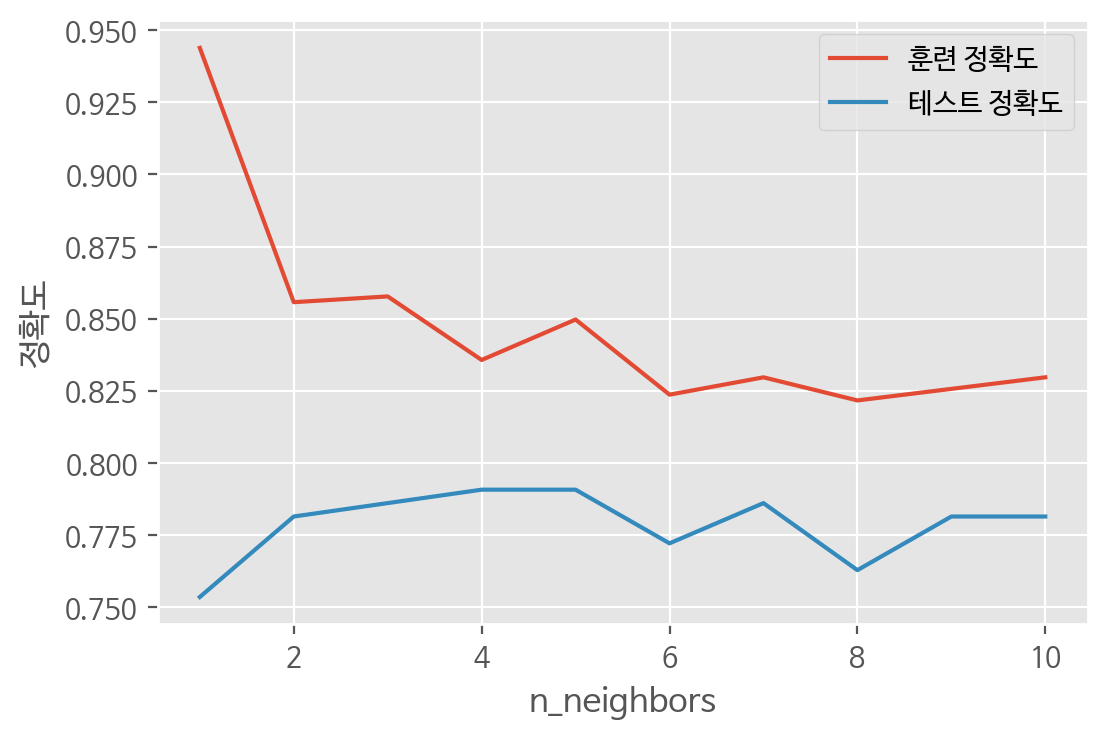

In [67]:
#이웃의 수에 따른 정확도 저장할 리스트 변수

train_accuracy = []
test_accuracy = []

# 1에서 10까지 n_nerighbors를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings :

  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  #훈련 세트 정확도 저장
  train_accuracy.append(clf.score(X_train, y_train))

  #테스트 세트 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

# 훈련 vs 테스트 정확도 시각화
plt.figure(dpi = 100)
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')

plt.plot(neighbors_settings,train_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings,test_accuracy, label='테스트 정확도')
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

k-Neighbors Regression

*   k=1 경우 그냥 가장 가까운 이웃의 타겟값
*   k>=2 경우 회귀분석->여러 개의 최근접 이웃 간의 평균(average or mean)이 예측 값



wave 데이터셋을 사용하여 이웃의 수(결정경계)에 따라 성능 평가

데이터 셋 분리하기(훈련셋,테스트셋)

In [82]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련셋과 테스트 셋으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0) # test size = 0.25

KNeighborsRegressor를 임포트하고 객체 생성

In [83]:
# 이웃의 수는 3으로 하여 모델 객체를 생성
reg = KNeighborsRegressor(n_neighbors=3)

훈련 세트를 사용하여 회귀 모델 학습

In [84]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

성능 평가하기 (선형에서는 결정 계수라고 한다.)

In [85]:
# score r-square 결정계수 0~1 사이 값을 갖고, 관계가 높을 수록 1에 가까운 값을 갖음
# 0에 가까울수록 데이터 분포를 제대로 표현하지 못한 것
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


KNeighborsRegressor 분석

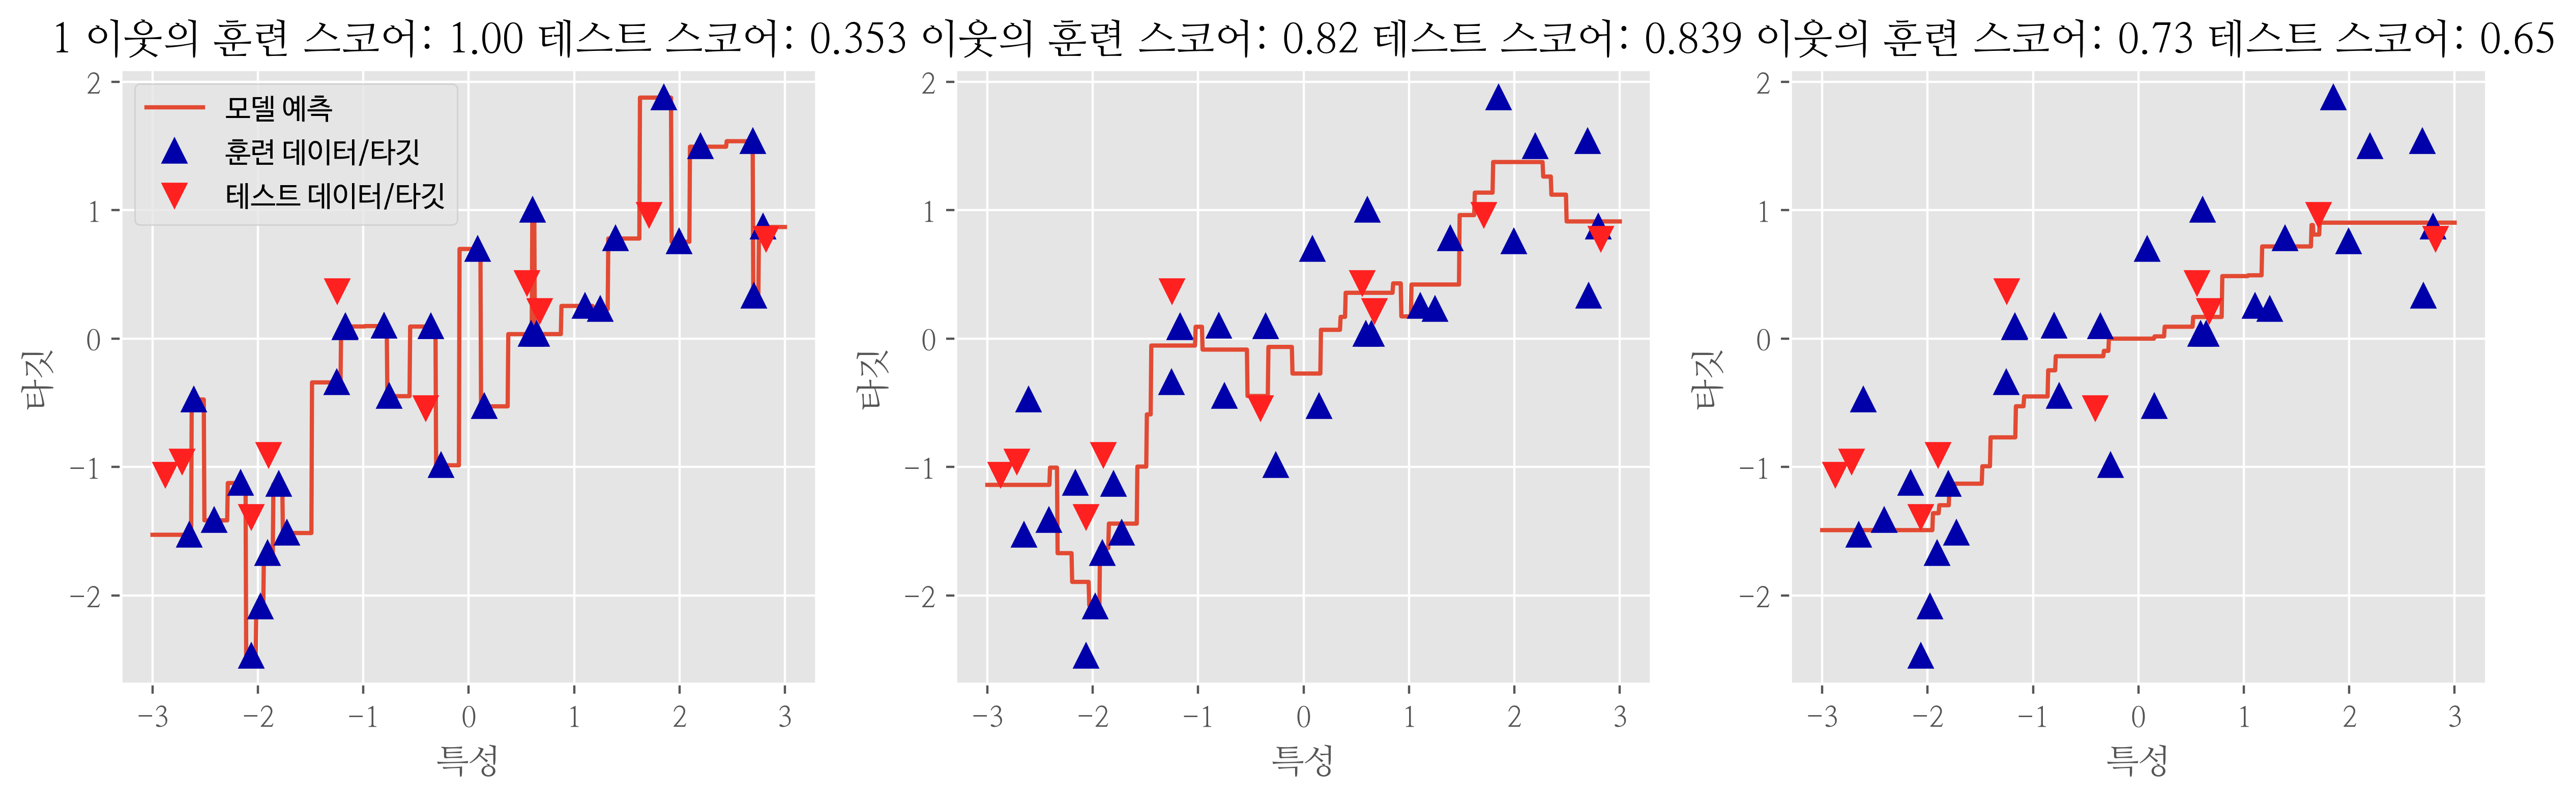

In [86]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4),dpi = 200)
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show()

선형 모델 : 선형 함수를 만들어 예측 수행

선형 회귀 모델

w[0]: 0.393906  b: -0.031804


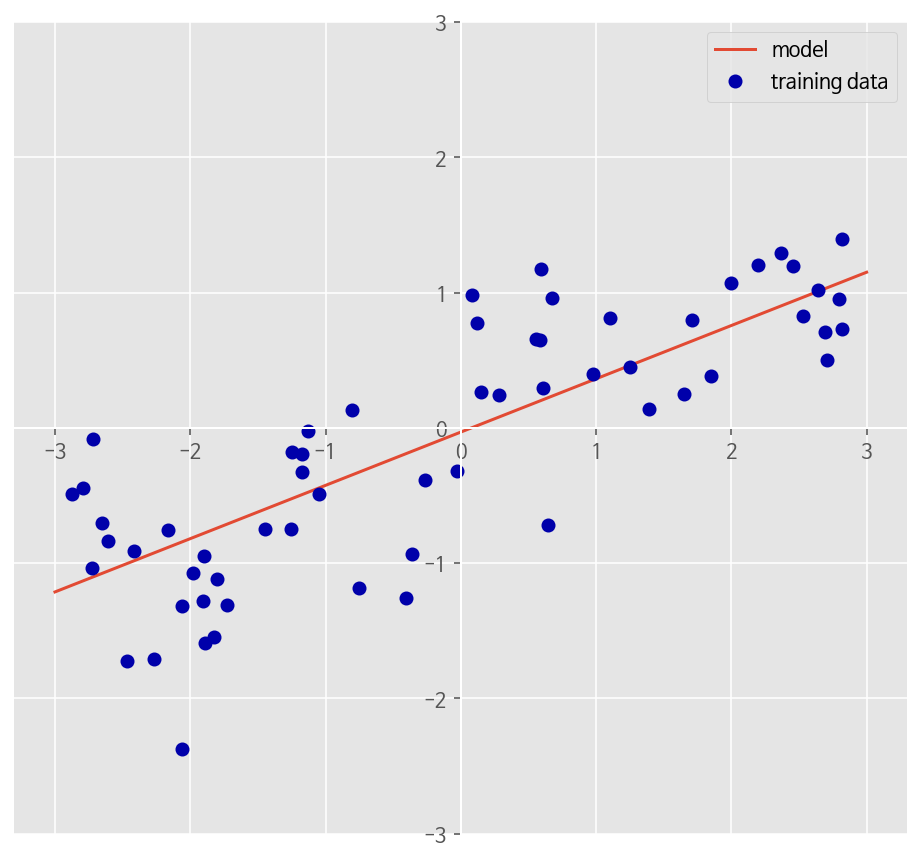

In [87]:
mglearn.plots.plot_linear_regression_wave()

선형회귀(최소제곱법)

데이터 준비하기

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X , y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

선형모델 만든 후 학습시키기

In [91]:
lr = LinearRegression().fit(X_train, y_train)

LR 객체 확인하기

In [94]:
print("lr.coef_ :",lr.coef_) # w 가중치, 기울기
print("lr.intercept_ :",lr.intercept_) # 절편

lr.coef_ : [0.39390555]
lr.intercept_ : -0.031804343026759746


성능 평가

In [96]:
print("훈련 세트 점수 : ",lr.score(X_train, y_train))
print("테스트 세트 점수 : ",lr.score(X_test, y_test))
# 훈련-테스트 세트의 점수가 비슷하고, 낮으면 과소 적합된 상황

훈련 세트 점수 :  0.6700890315075756
테스트 세트 점수 :  0.65933685968637


보스턴 주택가격 데이터셋을 사용한 선형 회귀 성능 평가

데이터셋 분리하기

In [99]:
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

후련 데이터셋으로 학습하기

In [100]:
lr = LinearRegression().fit(X_train, y_train)

성능 평가하기

In [101]:
print("훈련 세트 점수 : ",lr.score(X_train, y_train))
print("테스트 세트 점수 : ",lr.score(X_test, y_test))
# 과대적합(overfitting)인 상태

훈련 세트 점수 :  0.9520519609032727
테스트 세트 점수 :  0.607472195966557


릿지 회귀 -> 규제를 통해서 과대적합 되지 않게 하기 위한 선형 모델

보스턴 주택가격 데이터셋을 사용한 릿지 회귀 성능 평가

In [102]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) # alpha=1.0

성능 평가

In [104]:
print("훈련 세트 점수 : ",ridge.score(X_train, y_train))
print("테스트 세트 점수 : ",ridge.score(X_test, y_test))

훈련 세트 점수 :  0.8857966585170941
테스트 세트 점수 :  0.7527683481744751


alpha 매개변수를 통해 모델 설정

In [106]:
# alpha 값만 조정하여 성능 평가
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수 : ",ridge10.score(X_train, y_train))
print("테스트 세트 점수 : ",ridge10.score(X_test, y_test))

훈련 세트 점수 :  0.7882787115369614
테스트 세트 점수 :  0.6359411489177309


In [107]:
# alpha 값만 조정하여 성능 평가
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수 : ",ridge01.score(X_train, y_train))
print("테스트 세트 점수 : ",ridge01.score(X_test, y_test))

훈련 세트 점수 :  0.9282273685001992
테스트 세트 점수 :  0.7722067936479818


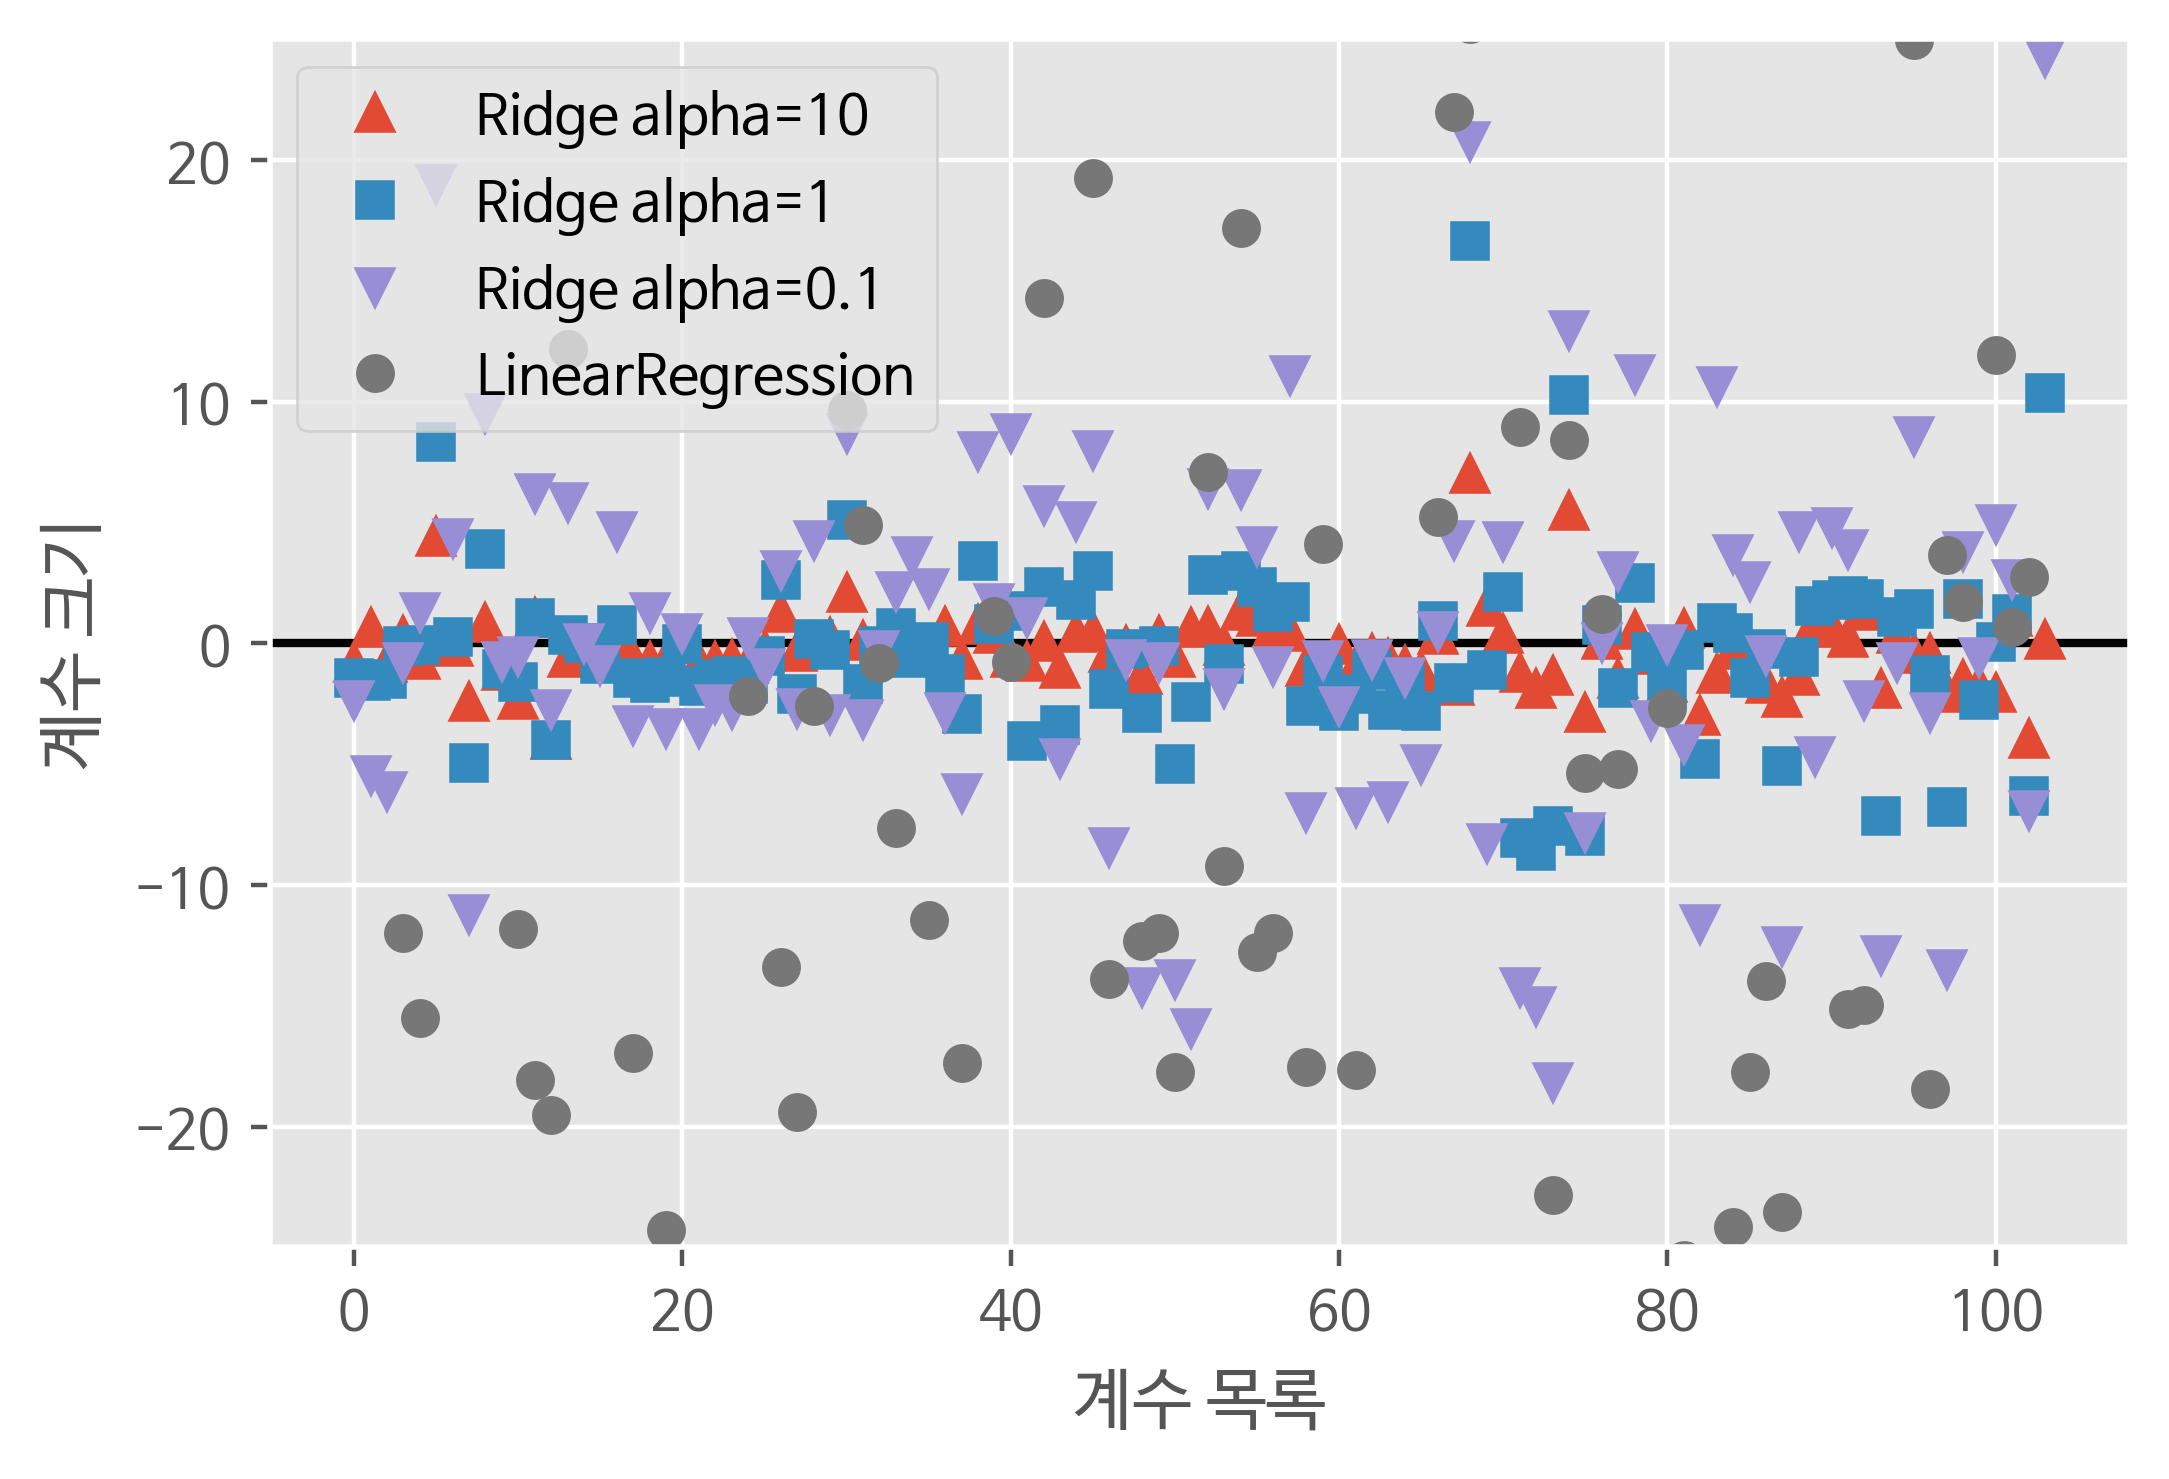

In [108]:
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi = 200)

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()

# Lasso

확장된 보스턴 주택가격 데이터셋에 라쏘를 적용

In [109]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : ",lasso.score(X_train, y_train))
print("테스트 세트 점수 : ",lasso.score(X_test, y_test))
print("사용한 특성의 개수:", np.sum(lasso.coef_ !=0))
# 과소 적합 상태

훈련 세트 점수 :  0.29323768991114607
테스트 세트 점수 :  0.20937503255272294


과소적합을 줄이기 위해서 alpha 설정(0.01)

In [111]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("훈련 세트 점수 : ",lasso001.score(X_train, y_train))
print("테스트 세트 점수 : ",lasso001.score(X_test, y_test))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ !=0))

훈련 세트 점수 :  0.8961122320864716
테스트 세트 점수 :  0.7677995670886713
사용한 특성의 개수: 32


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.90245800318007, tolerance: 3.233182126649076
  positive)


과소적합을 줄이기 위해서 alpha 설정(0.0001)

In [112]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("훈련 세트 점수 : ",lasso00001.score(X_train, y_train))
print("테스트 세트 점수 : ",lasso00001.score(X_test, y_test))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ !=0))

훈련 세트 점수 :  0.9420931515237063
테스트 세트 점수 :  0.6976541391663631
사용한 특성의 개수: 100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.9983395915502, tolerance: 3.233182126649076
  positive)


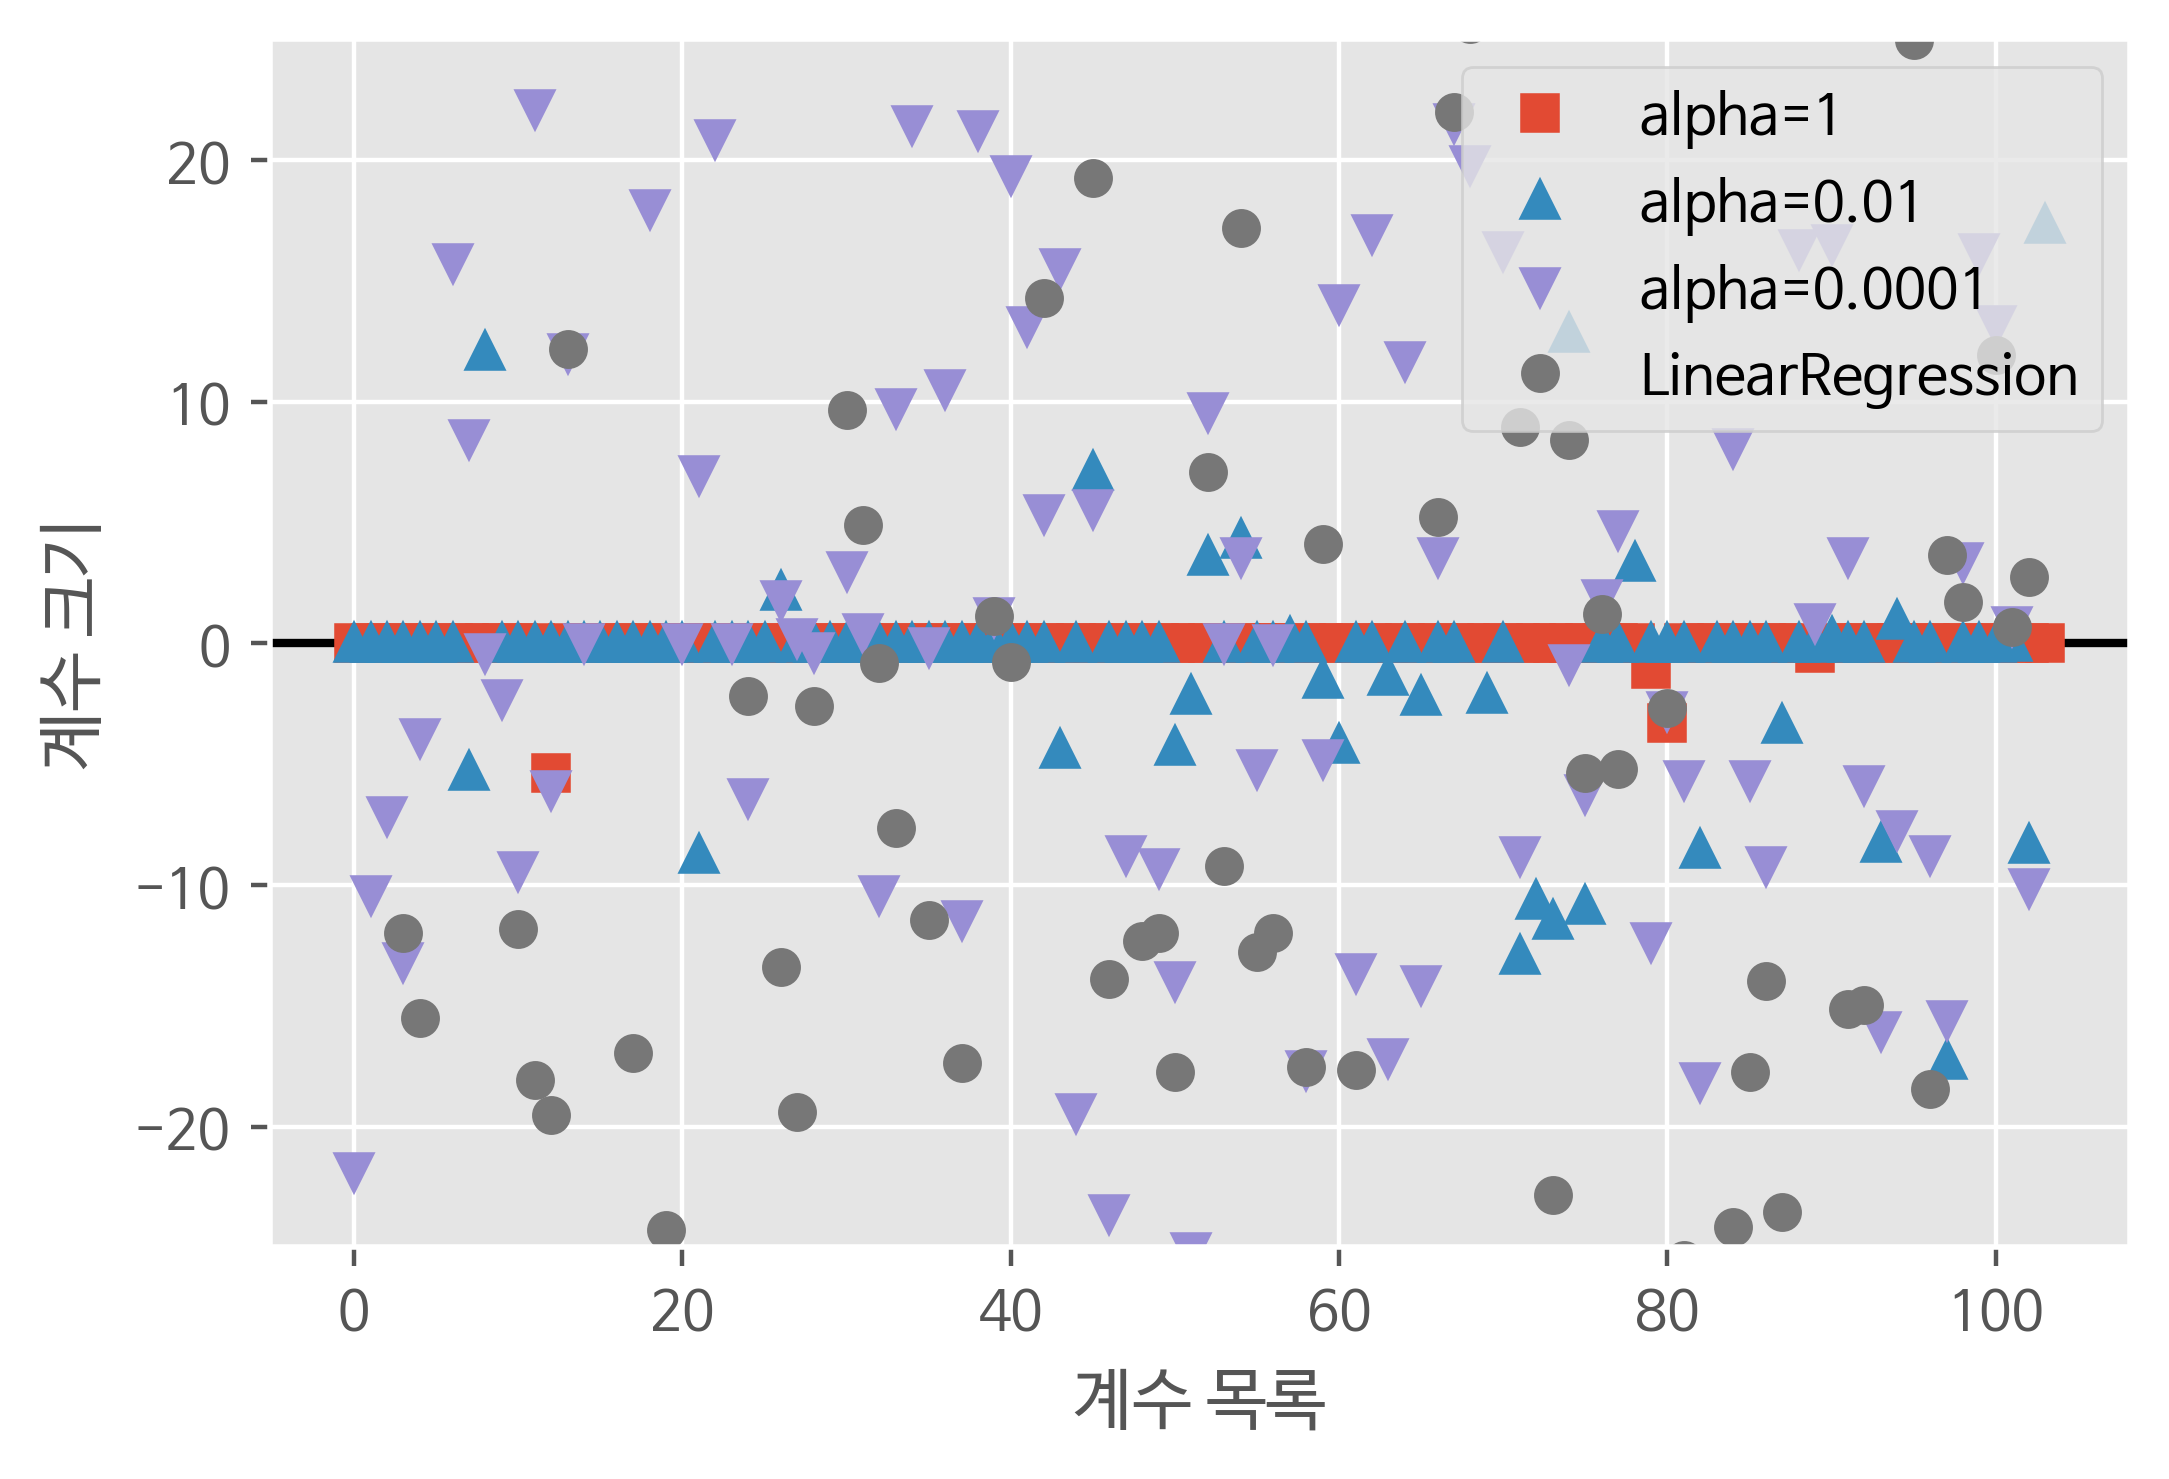

In [116]:
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi = 200)

plt.plot(lasso.coef_, 's', label="alpha=1")
plt.plot(lasso001.coef_, '^', label="alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="alpha=0.0001")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()